In [33]:
# importing libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# data loading and reading
card=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [39]:
# statistcal description of dataframe
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000
mean,23186.502044,-0.210769,0.090212,0.718086,0.205183,-0.215343,0.092961,-0.118041,0.031774,0.285485,-0.095064,0.471802,-0.580965,0.323908,0.291844,0.074456,-0.000304,0.174986,-0.086865,-0.037042,0.044957,-0.031917,-0.042490,0.008641,0.135181,0.021953,0.012227,0.003599,83.034366,0.003051
std,12310.554703,1.849230,1.545474,1.565917,1.413512,1.397150,1.312452,1.270591,1.257190,1.243503,1.142746,1.143182,1.438046,1.167647,1.183252,0.957799,0.937097,1.088030,0.857793,0.814637,0.671623,0.778003,0.544158,0.591997,0.435728,0.507048,0.388694,0.303696,227.868983,0.055153
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,-2.981121,-17.769143,-3.588761,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,11323.250000,-0.957639,-0.480557,0.248743,-0.705571,-0.813268,-0.646448,-0.598428,-0.156904,-0.504769,-0.574075,-0.350302,-1.635635,-0.474285,-0.234866,-0.486286,-0.489338,-0.322042,-0.559465,-0.527778,-0.160852,-0.241145,-0.177751,-0.325370,-0.128167,-0.331954,-0.062816,-0.007200,6.905000,0.000000
50%,28260.500000,-0.240862,0.125560,0.834797,0.194608,-0.251247,-0.165186,-0.072077,0.041389,0.164850,-0.148489,0.447906,-0.204428,0.251831,0.240706,0.198631,0.063443,0.120663,-0.068274,-0.036509,-0.022156,-0.084376,-0.051504,0.062636,0.174733,-0.061390,0.009070,0.021002,21.000000,0.000000
75%,33557.250000,1.162820,0.767388,1.460421,1.089341,0.303673,0.479350,0.439445,0.303476,1.025500,0.350293,1.247958,0.443449,1.104964,0.980463,0.754840,0.560614,0.615998,0.410285,0.471190,0.165501,0.091394,0.075396,0.398457,0.420014,0.301171,0.088390,0.076330,75.000000,0.000000
max,37373.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,12.018913,4.846452,4.465413,7.692209,3.635042,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [40]:
# shape of dataframe
card.shape

(33760, 31)

In [41]:
# columns name of dataframe
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [43]:
# check null values of dataframe
card.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [44]:
# check duplicated values in dataframe
card.duplicated().any()

True

In [45]:
# drop duplicated values 
card.drop_duplicates(inplace=True)

In [46]:
# check duplicated values again
card.duplicated().any()

False

In [47]:
# check again dataframe shape
card.shape

(33623, 31)

In [48]:
# dataframe spliting into Data(X) & label (Y)
data=card.iloc[:,:30]
label=card.iloc[:,-1]

In [49]:
# shape of data 
print(f"Shape of data is :{data.shape}\nShape of label is :{label.shape}")

Shape of data is :(33623, 30)
Shape of label is :(33623,)


In [51]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.30,random_state=1)

In [52]:
# Check the shape of training data,testing data,training labels,testing labels
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(23536, 30)
shape of training label is :(23536,)
shape of testing data is :(10087, 30)
shape of testing label is :(10087,)


In [53]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18616,29640,-0.399547,1.094109,1.171141,-0.190598,0.517747,0.016222,0.576096,0.184250,-0.768179,-0.410095,1.564774,1.054333,0.949240,-0.399201,0.372710,0.340464,-0.133261,-0.093901,-0.041590,0.154888,-0.197305,-0.450638,-0.054424,-0.335143,-0.190967,0.101608,0.264446,0.083088,0.89
29395,35454,-3.692532,-0.073583,0.215522,0.036928,-1.439595,-0.804291,-0.670331,1.473270,0.195859,-0.437599,0.400481,0.486775,-1.423284,0.967350,-0.643778,0.963550,-0.126603,0.675742,-0.519700,-0.301753,0.177087,0.495107,0.120812,0.577025,0.081133,0.427320,0.270867,-0.379456,12.00
4260,3755,-1.099826,0.553305,1.852622,-1.890851,-0.508044,0.594835,0.453870,0.196133,-0.235987,-0.061519,2.832101,-2.286658,2.043290,1.177304,-0.713854,0.953607,0.991423,-1.694003,-0.599161,0.287555,-0.172170,-0.193827,-0.026757,-0.376866,0.187845,-0.539118,0.428918,0.133980,115.34
31006,36171,1.236794,-0.838223,0.329272,-0.868248,-0.926534,-0.219226,-0.682916,0.018911,-0.884162,0.741493,0.857687,-0.170596,0.121011,-0.020187,0.285692,1.732041,-0.319671,-0.670163,1.045340,0.273535,0.047856,-0.208612,-0.070764,-0.359577,0.267617,-0.395104,-0.004430,0.022031,95.66
10851,18558,1.188398,-0.295145,1.019688,-0.566211,-0.933840,-0.297973,-0.711775,0.006729,3.059944,-1.507062,0.777474,-1.534194,1.855037,1.261795,0.757714,-0.775863,0.850486,-0.019583,-0.010577,-0.163647,-0.126238,0.159888,-0.006119,0.045053,0.409987,-0.697428,0.083379,0.027733,10.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14643,25861,1.136687,0.002121,0.246207,1.220701,-0.098532,0.289867,-0.163295,0.257817,0.335021,0.097615,0.551127,0.120446,-2.018261,0.613756,-0.565794,-0.343160,-0.000145,-0.146630,0.057042,-0.280404,-0.090927,-0.158704,-0.095844,-0.338192,0.612676,-0.304048,0.022786,-0.000838,11.99
23515,32798,-1.444385,0.197976,1.126451,0.170140,0.015102,0.117478,0.158056,0.777154,-0.531638,-0.747667,0.482606,-0.152369,-1.579706,0.922955,0.182919,0.715343,-0.664826,0.717460,-1.144174,-0.013056,0.460638,0.749087,0.016717,-0.348622,-0.018173,-0.382333,-0.021005,-0.014074,112.00
6947,9028,-5.311325,0.226306,-0.711939,0.897147,-0.157203,-1.674941,-0.989897,1.257261,1.839282,0.344494,0.858541,-2.274796,1.214376,1.664544,0.754410,0.621217,1.540057,-0.374131,-0.504372,-1.975322,-1.197472,-0.526393,2.068456,0.303329,0.564604,0.213824,1.064833,-0.709296,9.83
30492,35953,-1.095051,-0.389532,1.440527,-0.459400,-0.954023,-0.233431,-0.110326,0.592146,0.499220,-1.401036,-0.479658,1.304324,0.991041,-0.550757,-0.910282,-0.166814,0.335328,-1.169614,-0.780470,0.200515,0.071209,-0.0573402,0.466539,0.469916,-0.425898,0.732541,-0.190738,-0.157249,144.49


In [54]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [66]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')
y_test=np.asarray(y_test).astype("float32")
y_train=np.asarray(y_train).astype("float32")

In [56]:
val_x=X_train[:100000]
partial_x_train=X_train[100000:]
val_y=y_train[:100000]
partial_y_train=y_train[100000:]

In [57]:
from keras import models, layers , optimizers

In [67]:
network=models.Sequential()
network.add(layers.Dense(6,activation="tanh",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4,activation="tanh"))
network.add(layers.Dense(1,activation="sigmoid"))

In [59]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 186       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


In [62]:
network.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [69]:
history_dict=history.history
history_dict.keys()
[u"loss",u"accuracy",u"val_loss",u"val_accuracy"]

['loss', 'accuracy', 'val_loss', 'val_accuracy']

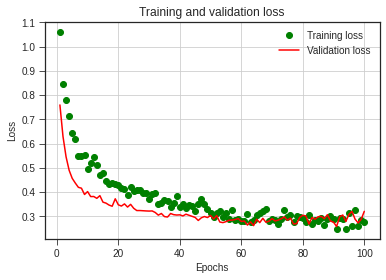

In [70]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()